In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from prepare import basic_clean, tokenize, lemmatize, stem, remove_stopwords, prep_repo_data, split_data
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from acquire import get_df

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns

import varname

import warnings
warnings.filterwarnings("ignore")

### TEST CELLS FOR MODULE CREATION

In [2]:
# function to get repo_names for acquire

def get_repo_names():
    repo_names = []

    for page in range(1,10):
        print(f'Scraping page {page}...')
        link = f'https://github.com/search?p={page}&q=zombie&type=Repositories'
        print(f'Address: {link}')
        response = requests.get(link, headers={'user-agent': 'Codeup DS Hopper'})
        soup = BeautifulSoup(response.text)
        print(f"First repository on page... {soup.find_all('a',class_='v-align-middle')[0]['href']}")
        time.sleep(5)
        for repository in range(0,len(soup.find_all('a',class_='v-align-middle'))):
            repo_names.append(soup.find_all('a', class_='v-align-middle')[repository]['href'])
    time.sleep(10)

    for page in range(11,20):
        print(f'Scraping page {page}...')
        link = f'https://github.com/search?p={page}&q=zombie&type=Repositories'
        print(f'Address: {link}')
        response = requests.get(link, headers={'user-agent': 'Codeup DS Hopper'})
        soup = BeautifulSoup(response.text)
        print(f"First repository on page... {soup.find_all('a',class_='v-align-middle')[0]['href']}")
        time.sleep(5)
        for repository in range(0,len(soup.find_all('a',class_='v-align-middle'))):
            repo_names.append(soup.find_all('a', class_='v-align-middle')[repository]['href'])
    return repo_names

In [3]:
# repo_names = get_repo_names()
# repo_names

In [4]:
# read data.json into dataframe... add to acquire.py
# df = pd.read_json('data.json')
# df.head()

In [5]:
# create columns and add into prepare.py functions

# df['clean'] = [tokenize(basic_clean(readme)) for readme in df.readme_contents]
# df['clean'] = [re.sub('[\n]','', readme) for readme in df.clean]
# df['stemmed'] = [remove_stopwords(stem(readme)) for readme in df.clean]
# df['lemmatized'] = [remove_stopwords(lemmatize(readme)) for readme in df.clean]

In [6]:
# languages = df.language.value_counts()[df.language.value_counts() >= 11].index.to_list()
# df = df[df.language.isin(languages)]

In [7]:
# df.drop_duplicates(inplace=True)

In [8]:
# df.language.value_counts()

In [9]:
# languages = ['HTML','SourcePawn','C','PHP','Ruby']
# repo_names = []

# for page in range(1,10):
#     for language in languages:
#         print(f'Scraping page {page} of {language}...')
#         link = f'https://github.com/search?l={language}&p={page}&q=zombie&type=Repositories'
#         print(f'Address: {link}')
#         response = requests.get(link, headers={'user-agent': 'Codeup DS Hopper'})
#         soup = BeautifulSoup(response.text)
#         print(f"First repository on page... {soup.find_all('a',class_='v-align-middle')[0]['href']}")
#         time.sleep(5)
#         for repository in range(0,len(soup.find_all('a',class_='v-align-middle'))):
#             repo_names.append(soup.find_all('a', class_='v-align-middle')[repository]['href'])
# time.sleep(10)


# for page in range(11,20):
#     for language in languages:
#         print(f'Scraping page {page} of {language}...')
#         link = f'https://github.com/search?l={language}&p={page}&q=zombie&type=Repositories'
#         print(f'Address: {link}')
#         response = requests.get(link, headers={'user-agent': 'Codeup DS Hopper'})
#         soup = BeautifulSoup(response.text)
#         print(f"First repository on page... {soup.find_all('a',class_='v-align-middle')[0]['href']}")
#         time.sleep(5)
#         for repository in range(0,len(soup.find_all('a',class_='v-align-middle'))):
#             repo_names.append(soup.find_all('a', class_='v-align-middle')[repository]['href'])

In [10]:
# repo_names

### Begin Exploration

In [11]:
# retrieve dataframe from acquire and run through prepare.py
df = get_df()
df = prep_repo_data(df)

# split data
train, validate, test = split_data(df)

In [12]:
# create word strings
javascript_words = basic_clean(' '.join(df[df.language == 'JavaScript'].lemmatized))
c_sharp_words = basic_clean(' '.join(df[df.language == 'C#'].lemmatized))
php_words = basic_clean(' '.join(df[df.language == 'PHP'].lemmatized))
c_words = basic_clean(' '.join(df[df.language == 'C'].lemmatized))
sourcepawn_words = basic_clean(' '.join(df[df.language == 'SourcePawn'].lemmatized))
html_words = basic_clean(' '.join(df[df.language == 'HTML'].lemmatized))
c_plus_plus_words = basic_clean(' '.join(df[df.language == 'C++'].lemmatized))
java_words = basic_clean(' '.join(df[df.language == 'Java'].lemmatized))
python_words = basic_clean(' '.join(df[df.language == 'Python'].lemmatized))
lua_words = basic_clean(' '.join(df[df.language == 'Lua'].lemmatized))
ruby_words = basic_clean(' '.join(df[df.language == 'Ruby'].lemmatized))
all_words = basic_clean(' '.join(df.lemmatized))

In [13]:
# create series of word frequencies per language
javascript_freq = pd.Series(javascript_words.split()).value_counts()
c_sharp_freq = pd.Series(c_sharp_words.split()).value_counts()
php_freq = pd.Series(php_words.split()).value_counts()
c_freq = pd.Series(c_words.split()).value_counts()
sourcepawn_freq = pd.Series(sourcepawn_words.split()).value_counts()
html_freq = pd.Series(html_words.split()).value_counts()
c_plus_plus_freq =pd.Series(c_plus_plus_words.split()).value_counts() 
java_freq = pd.Series(java_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
lua_freq = pd.Series(lua_words.split()).value_counts()
ruby_freq = pd.Series(ruby_words.split()).value_counts()

# all languages word frequency
all_freq = pd.Series(all_words.split()).value_counts()

In [14]:
javascript_freq,
c_sharp_freq,
php_freq,
c_freq,
sourcepawn_freq,
html_freq,
c_plus_plus_freq,
java_freq,
python_freq,
lua_freq,
ruby_freq

'              77
method         20
zombie         19
run            18
article        16
               ..
669             1
seesdefined     1
connection      1
pas             1
attrreader      1
Length: 860, dtype: int64

In [15]:
word_counts = pd.concat([javascript_freq, c_sharp_freq, php_freq, c_freq, sourcepawn_freq, html_freq, c_plus_plus_freq, java_freq, python_freq, lua_freq, ruby_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['javascript', 'c_sharp', 'php','c','sourcepawn','html','c_plus_plus','java','python','lua','ruby','all']
word_counts.head()

,javascript,c_sharp,php,c,sourcepawn,html,c_plus_plus,java,python,lua,ruby,all
',525,92,121,96,23,48,8,30,154,22,77,1196
function,145,1,0,5,1,9,2,1,8,0,0,172
user,127,6,9,2,1,25,0,10,0,2,5,187
click,120,3,2,2,0,2,3,0,2,0,0,134
lambda,111,0,0,0,0,0,0,0,0,0,0,111


In [16]:
# list of variable names for word clouds
word_lists = [javascript_words,
c_sharp_words,
php_words,
c_words,
sourcepawn_words,
html_words,
c_plus_plus_words,
java_words,
python_words,
lua_words,
ruby_words]

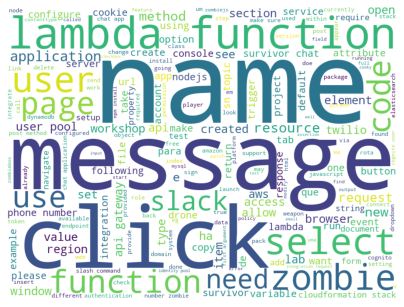

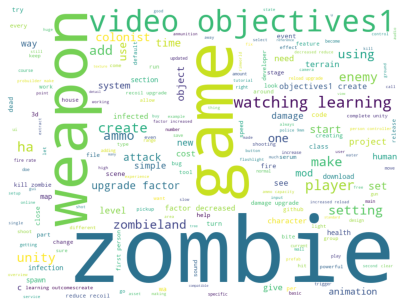

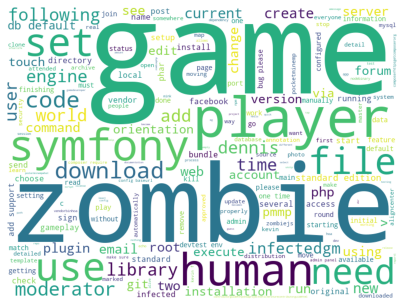

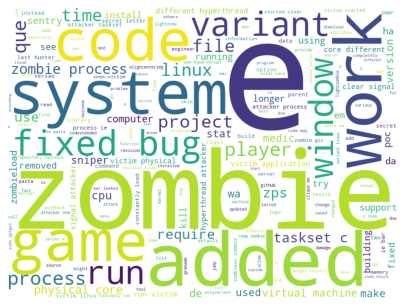

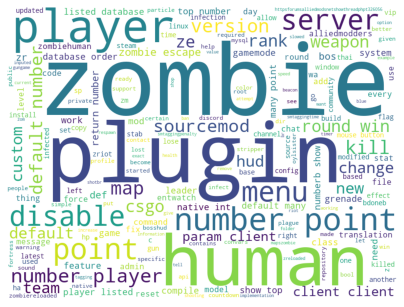

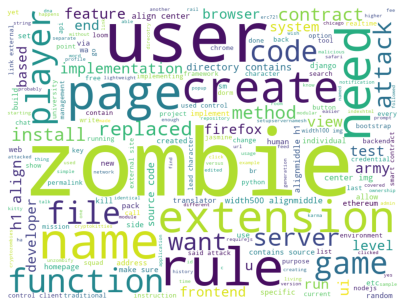

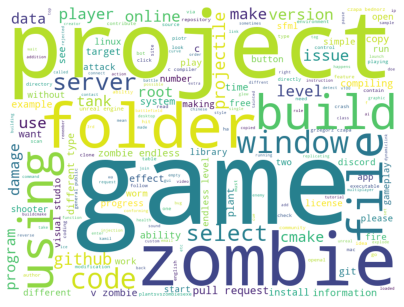

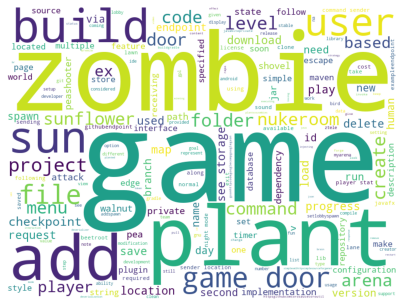

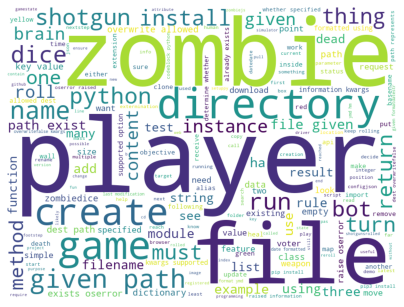

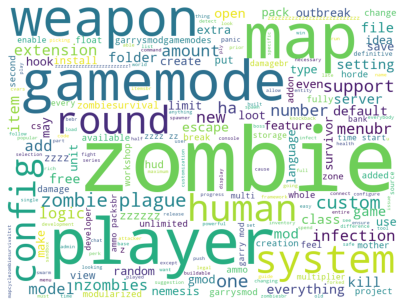

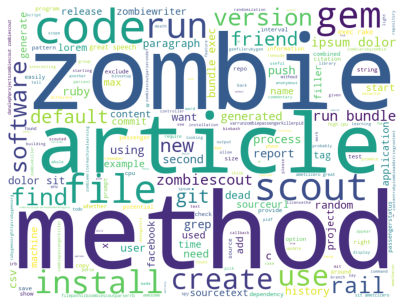

In [19]:
for word_list in word_lists:
    plt.figure(figsize=(7,7))
    img = WordCloud(background_color='white', width=800, height=600).generate(word_list)
    plt.imshow(img)
    plt.axis('off')